# XGBoost-Regression
---

### Objectives:

- Use XGBoost regression models

- Apply XGBoost Regressor on a real world data set

### Installs:

In [0]:
%%capture
%pip install numpy==2.4.0
%pip install pandas==2.3.3
%pip install scikit-learn==1.8.0
%pip install matplotlib==3.10.8
%pip install seaborn==0.13.0
%pip install xgboost==3.1.3

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

### Imports:

In [0]:
# Data Analize and Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Modeling / Model Linear / Metrics
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [0]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True )
X, y = data.data, data.target
df = pd.concat([X, y], axis = 1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Verify successful load with some randomly selected records


In [0]:
df.sample(9)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
11732,2.2917,19.0,5.695652,1.423913,493.0,2.679348,39.12,-120.69,1.182
1150,1.7308,26.0,4.929471,1.080605,945.0,2.380353,39.52,-121.56,0.536
15410,2.1293,9.0,4.735238,1.192381,1938.0,3.691429,33.21,-117.24,1.514
18239,3.1736,23.0,2.495146,1.019417,367.0,1.781553,37.40,-122.10,1.813
6674,3.4167,35.0,4.583333,1.164062,984.0,2.562500,34.15,-118.12,1.982
4434,2.2708,34.0,3.530000,1.102000,2203.0,4.406000,34.07,-118.20,1.596
1861,3.0313,17.0,5.870614,1.164474,1244.0,2.728070,41.84,-124.30,1.036
18110,3.3750,19.0,3.679847,1.095663,1520.0,1.938776,37.31,-122.03,2.757
17869,5.0808,24.0,5.008264,1.037190,799.0,3.301653,37.44,-121.91,2.125



### Understand the data

---

This dataset is derived from the 1990 U.S. census and contains information about housing in California. The data is aggregated at the level of "block groups," which are the smallest geographical units for which the U.S. Census Bureau publishes sample data (typically representing a population of 600 to 3,000 people).

The goal is to build a regression model to predict the **median house value** for a given district (block group) based on various demographic and structural characteristics. Unlike individual house listings, these metrics represent averages or medians for the entire block group.

* **MedInc** *Continuous* - Median income in the block group (measured in tens of thousands of US Dollars).

* **HouseAge** *Continuous* - Median house age in the block group.

* **AveRooms** *Continuous* - Average number of rooms per household.

* **AveBedrms** *Continuous* - Average number of bedrooms per household.

* **Population** *Continuous* - Total population in the block group.

* **AveOccup** *Continuous* - Average number of household members (occupancy).

* **Latitude** *Continuous* - Block group latitude (geographical coordinate).

* **Longitude** *Continuous* - Block group longitude (geographical coordinate).

* **MedHouseVal** *Continuous* - Median house value for California districts, expressed in hundreds of thousands of dollars (Target Variable).

### Explore the data
First, consider a statistical summary of the data.

In [0]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Visualize features

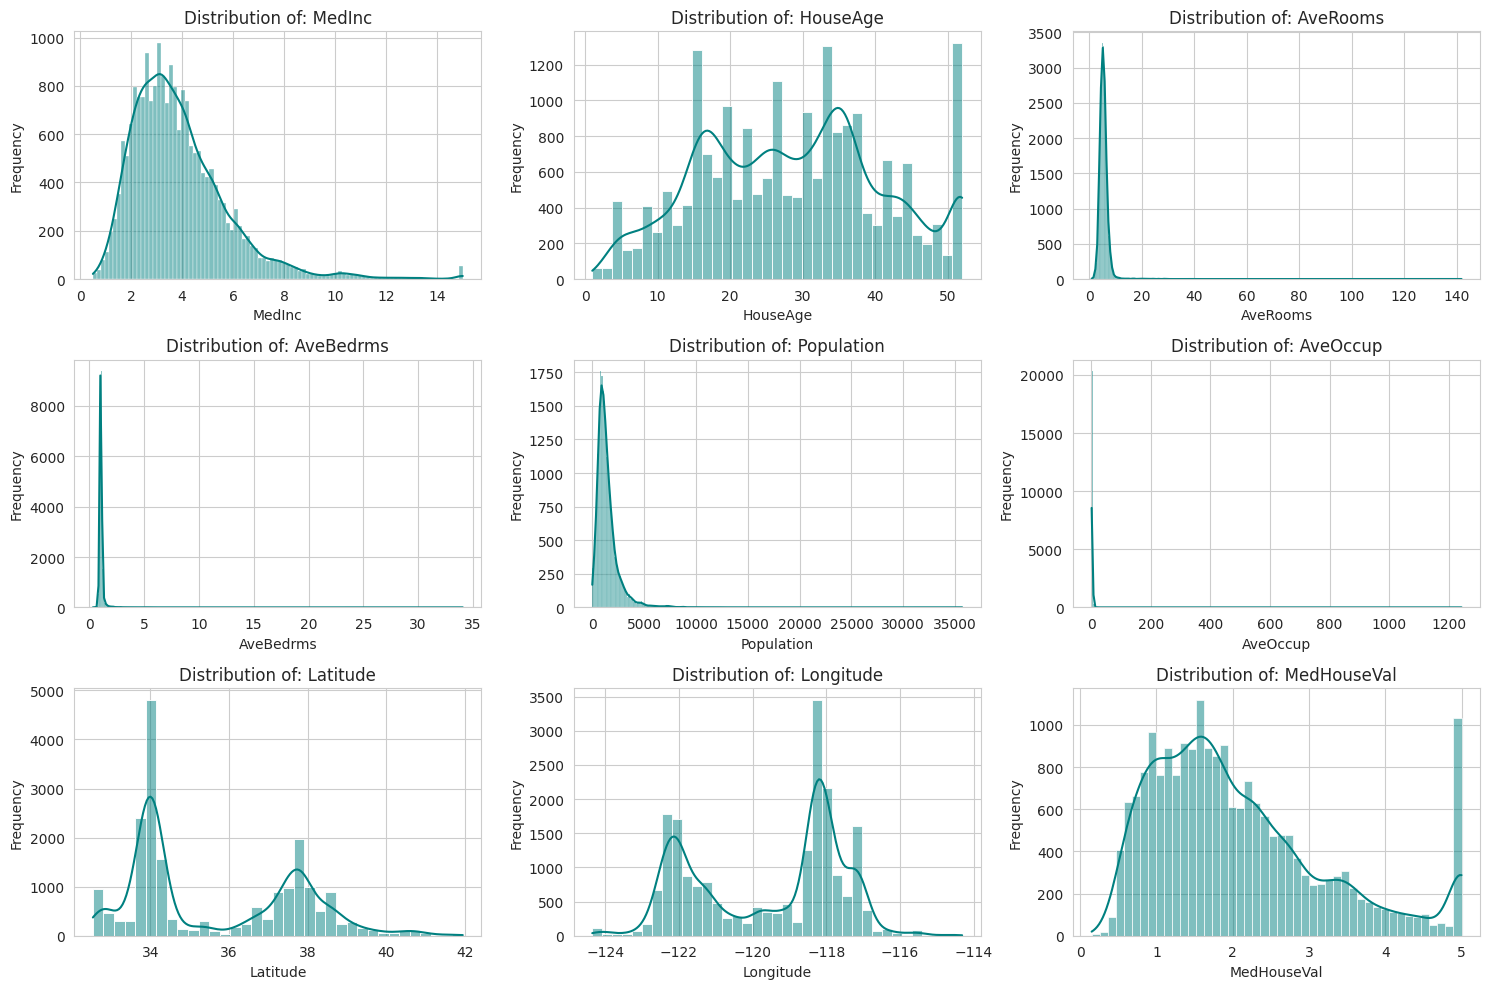

In [0]:
sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (15, 10))

for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1) # Create a grid 2x2

    # Histogram
    sns.histplot(
        data = df[col],
        kde = True,
        color = 'teal'
    )

    plt.title(f'Distribution of: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The dataset presents extreme physical anomalies, such as households with over 1200 occupants or 140 rooms, which likely indicate data errors or the presence of non-residential institutions.

### Checking the correlations between the variables

In [0]:
df.corr()['MedHouseVal'].abs().sort_values(ascending = False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
Latitude       0.144160
HouseAge       0.105623
AveBedrms      0.046701
Longitude      0.045967
Population     0.024650
AveOccup       0.023737
Name: MedHouseVal, dtype: float64

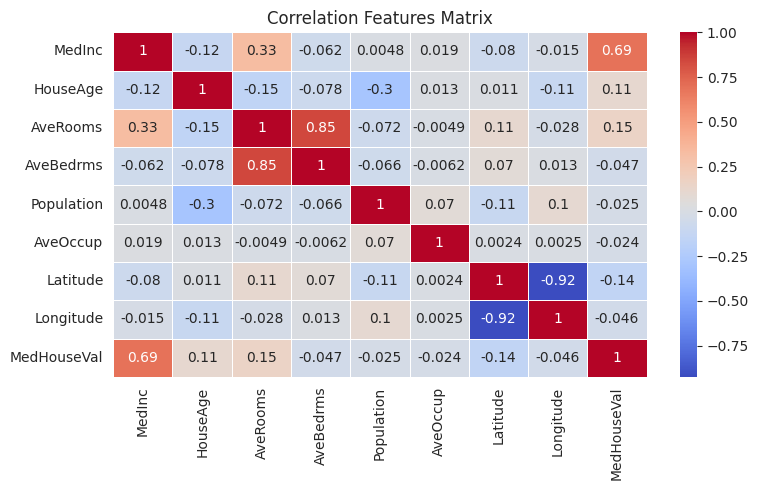

In [0]:
plt.rc('font', size = 10)
fig, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5, ax = ax)
ax.set_title('Correlation Features Matrix')
plt.tight_layout()
plt.show()

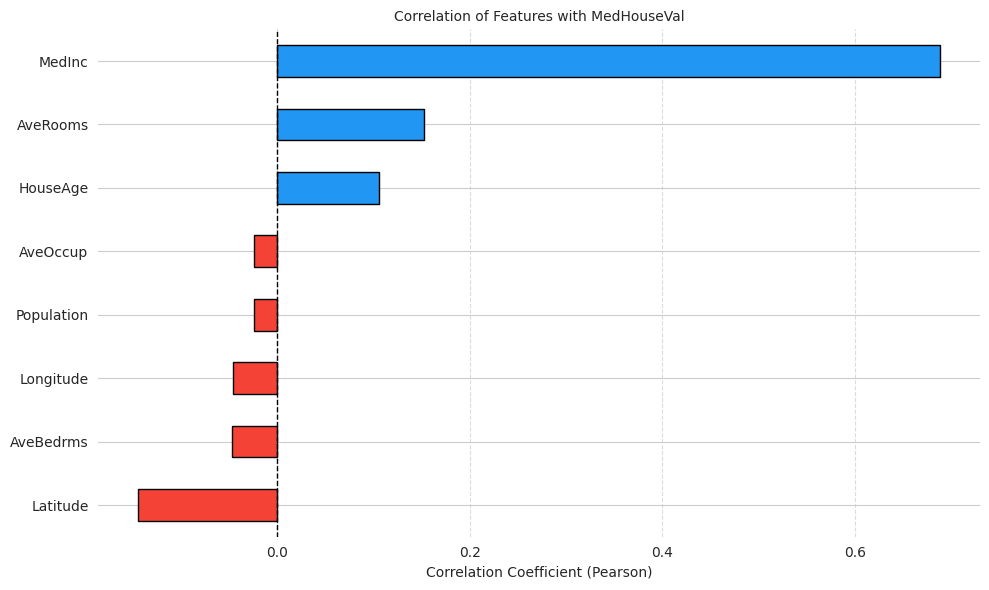

In [0]:
# Collecting data
correlation_values = df.corr()['MedHouseVal']

if 'MedHouseVal' in  correlation_values.index:
    plot_data = correlation_values.drop('MedHouseVal').sort_values()

else:
    plot_data = correlation_values.sort_values()


# Colors 
colors = ['#2196f3' if x > 0 else '#f44336' for x in plot_data]

# Figure
plt.figure(figsize = (10, 6))

# Plot
plot_data.plot(
    kind = 'barh', 
    color = colors, 
    edgecolor = 'black'
)

plt.title('Correlation of Features with MedHouseVal', fontsize = 10)
plt.xlabel('Correlation Coefficient (Pearson)', fontsize = 10)
plt.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

sns.despine(left = True, bottom = True) 

plt.tight_layout()
plt.show()

### Selected features an train test split

In [0]:
# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
print(f'Data shape: {X.shape}')
print(f'Target shape: {y.shape}')

Data shape: (20640, 8)
Target shape: (20640,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 33)
print(f'The shape X_train: {X_train.shape}')
print(f'The shape y_train: {y_train.shape}')
print(f'The shape X_test: {X_test.shape}')
print(f'The shape y_test: {y_test.shape}')

The shape X_train: (16512, 8)
The shape y_train: (16512,)
The shape X_test: (4128, 8)
The shape y_test: (4128,)


#### Train data

In [0]:
X_train[0: 5]

array([[ 2.90760000e+00,  2.40000000e+01,  4.22049689e+00,
         1.11645963e+00,  3.01800000e+03,  4.68633540e+00,
         3.42400000e+01, -1.18530000e+02],
       [ 4.20190000e+00,  2.50000000e+01,  3.62544170e+00,
         1.01766784e+00,  1.64600000e+03,  5.81625442e+00,
         3.38500000e+01, -1.17930000e+02],
       [ 2.62960000e+00,  2.50000000e+01,  3.90322581e+00,
         1.09566185e+00,  2.35900000e+03,  2.62402670e+00,
         3.26500000e+01, -1.17090000e+02],
       [ 1.67310000e+00,  4.10000000e+01,  4.03682720e+00,
         1.05382436e+00,  1.80300000e+03,  5.10764873e+00,
         3.39900000e+01, -1.18240000e+02],
       [ 3.68750000e+00,  4.20000000e+01,  5.63725490e+00,
         1.05392157e+00,  7.08000000e+02,  3.47058824e+00,
         3.38900000e+01, -1.18090000e+02]])

#### Test data

In [0]:
X_test[0: 5]

array([[ 6.63200000e+00,  2.70000000e+01,  5.87921847e+00,
         1.06216696e+00,  1.40200000e+03,  2.49023091e+00,
         3.36500000e+01, -1.17900000e+02],
       [ 2.22270000e+00,  3.00000000e+01,  5.27855153e+00,
         1.01949861e+00,  9.90000000e+02,  2.75766017e+00,
         4.07700000e+01, -1.24170000e+02],
       [ 6.04260000e+00,  1.90000000e+01,  4.83950617e+00,
         1.34567901e+00,  2.87000000e+02,  3.54320988e+00,
         3.79700000e+01, -1.22340000e+02],
       [ 1.97620000e+00,  5.20000000e+01,  4.24275362e+00,
         1.15217391e+00,  1.12600000e+03,  4.07971014e+00,
         3.40600000e+01, -1.17750000e+02],
       [ 3.16350000e+00,  3.00000000e+01,  3.50506757e+00,
         1.16047297e+00,  1.02600000e+03,  1.73310811e+00,
         3.40200000e+01, -1.18490000e+02]])

### XGBoot Regressor Model

In [0]:
# Create a model object
XGB = XGBRegressor(
    n_estimators = 1000,
    learning_rate = 0.05,
    max_depth = 6,
    min_child_weight = 3,
    gamma = 0.1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'reg:squarederror',
    eval_metric = 'rmse',
    random_state = 33,    
)

# Train the model in the training data
XGB.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [0]:
# Predict the target variable in the test data
y_pred = XGB.predict(X_test)

### Model Evaluation

#### Metrics

In [0]:
print(f'Mean Absolute error: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Mean Squared error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'Root men squared error: {root_mean_squared_error(y_test, y_pred):.2f}')
print(f'R2-score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute error: 0.28
Mean Squared error: 0.17
Root men squared error: 0.42
R2-score: 0.87


####  Visualize model outputs

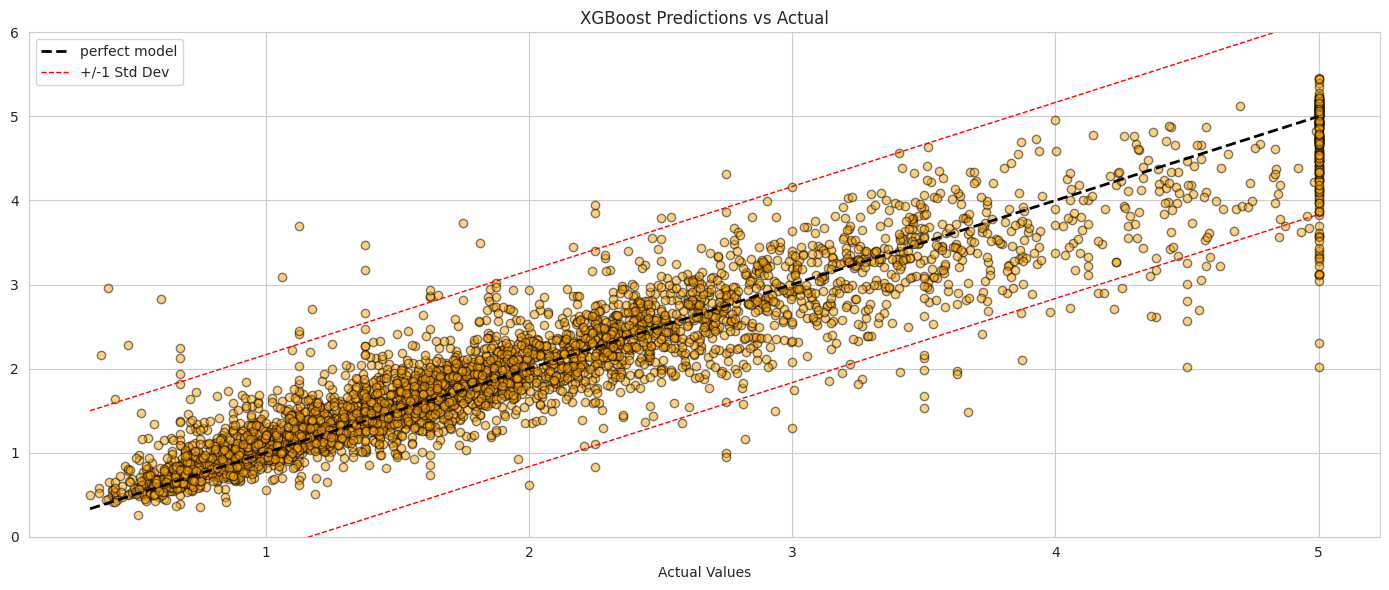

In [0]:
# XGBoost plot

# Standard deviation of y_teste
std_y = np.std(y_test)

# Figure
plt.figure(figsize=(14, 6))

plt.scatter(
  y_test, 
  y_pred, 
  alpha = 0.5, 
  color = 'orange', 
  ec = 'k'
)

plt.plot(
  [y_test.min(), 
   y_test.max()], 
  [y_test.min(), 
   y_test.max()], 
  'k--', 
  lw = 2,
  label = 'perfect model'
)
plt.plot(
  [y_test.min(), 
   y_test.max()], 
  [y_test.min() + std_y, 
   y_test.max() + std_y], 
  'r--', lw=1, 
  label='+/-1 Std Dev'
)

plt.plot(
  [y_test.min(), 
   y_test.max()], 
  [y_test.min() - std_y, y_test.max() - std_y], 
  'r--', 
  lw = 1
)

plt.ylim(0,6)
plt.title('XGBoost Predictions vs Actual')
plt.xlabel('Actual Values')
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
importances = pd.Series(XGB.feature_importances_, index = df.columns[:-1])
importances

MedInc        0.456509
HouseAge      0.068654
AveRooms      0.064710
AveBedrms     0.034092
Population    0.026605
AveOccup      0.126065
Latitude      0.102109
Longitude     0.121256
dtype: float32

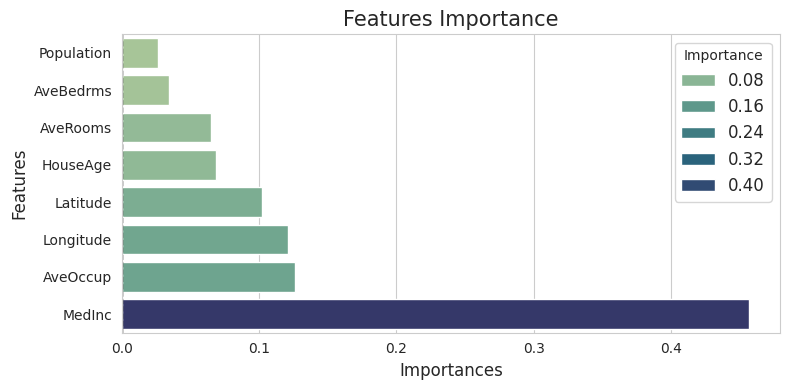

In [0]:
# Data collect
data_ax = importances.sort_values().reset_index()
data_ax.columns = ['Feature', 'Importances']

# Figure
plt.figure(figsize = (8, 4))
sns.set_style('whitegrid')

# Barplot
sns.barplot(
    data = data_ax,
    y = 'Feature',
    x = 'Importances',
    edgecolor = 'white',
    hue = 'Importances',
    dodge = False,
    palette = 'crest'
)

plt.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.title('Features Importance', fontsize = 15)
plt.xlabel('Importances', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.legend(title = 'Importance', loc = 'upper right', fontsize = 12)

plt.tight_layout()
plt.show()


### Conclusion

---

- The developed **XGBoost Regressor** demonstrates high predictive accuracy and generalization capability for the housing market. With an **R² Score of 0.87**, the model successfully explains **87% of the variance** in property prices, leaving only a small margin of error attributable to unobserved variables or random noise. This indicates a robust fit that captures the complex, non-linear dynamics of the California real estate market.

- The analysis of **Feature Importance** reveals that economic capacity is the single most critical determinant of housing value, far outweighing structural characteristics:

  - **`MedInc` (Median Income)** is the undisputed dominant predictor, accounting for **45.7%** of the model's decision power. This confirms that the purchasing power of the neighborhood is nearly half of the equation for determining price.
  - **Geospatial Features** (`AveOccup` at 12.6%, `Longitude` at 12.1%, and `Latitude` at 10.2%) form the second tier of influence. Combined, these location and density factors contribute over **34%**, validating the real estate principle that location and neighborhood profile are critical value drivers.
  - Structural features like **`HouseAge` (6.9%)** and **`AveRooms` (6.5%)** play a tertiary role, suggesting that the physical attributes of the house are less important than *where* it is located and *who* lives there.


- Detailed error metrics indicate precise estimation capabilities given the scale of the target variable:

  - The **Root Mean Squared Error (RMSE) of 0.42** implies that, on average, the model's predictions deviate by approximately **$42,000** (0.42 * $100k) from the actual values. Considering the variance in real estate prices, this is a competitive margin of error.
  - The **Mean Absolute Error (MAE) of 0.28** is even lower, showing that for the majority of "typical" houses (excluding extreme outliers), the prediction error is closer to **$28,000**.

- In summary, the model successfully prioritized **Socioeconomic factors (`MedInc`)** and **Location** over physical dimensions (`AveBedrms`, `Population`), demonstrating that the XGBoost architecture effectively mapped the non-linear relationship between wealth, geography, and real estate value.